In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np 
import cv2
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator




train_dir = r'/Users/laxmikanthreddy/Downloads/Classified_Images'
val_dir = r'/Users/laxmikanthreddy/Downloads/Classified_Images'
train_datagen = ImageDataGenerator (rescale=1./255)
val_datagen=ImageDataGenerator (rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')
validation_generator = val_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')


Found 3053 images belonging to 6 classes.
Found 3053 images belonging to 6 classes.


In [2]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2,2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D (128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D (pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout (0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense (1024, activation='relu'))
emotion_model.add(Dropout (0.5))
emotion_model.add(Dense (6, activation='softmax'))


In [3]:
emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])


emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=3056 // 64,
        epochs=65,
        validation_data=validation_generator,
        validation_steps=2000 // 64)


/var/folders/1v/8nfvtp1x1flg1mh9y30vg8380000gn/T/ipykernel_1993/1689965623.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(


Epoch 1/65
47/47 [==============================] - 25s 532ms/step - loss: 1.6582 - accuracy: 0.3583 - val_loss: 1.6111 - val_accuracy: 0.3735
Epoch 2/65
47/47 [==============================] - 25s 526ms/step - loss: 1.5880 - accuracy: 0.3844 - val_loss: 1.5958 - val_accuracy: 0.3770
Epoch 3/65
47/47 [==============================] - 25s 537ms/step - loss: 1.5819 - accuracy: 0.3794 - val_loss: 1.5558 - val_accuracy: 0.3770
Epoch 4/65
47/47 [==============================] - 26s 554ms/step - loss: 1.5351 - accuracy: 0.3968 - val_loss: 1.5104 - val_accuracy: 0.4259
Epoch 5/65
47/47 [==============================] - 26s 562ms/step - loss: 1.4335 - accuracy: 0.4256 - val_loss: 1.3427 - val_accuracy: 0.4561
Epoch 6/65
47/47 [==============================] - 27s 576ms/step - loss: 1.3370 - accuracy: 0.4520 - val_loss: 1.2469 - val_accuracy: 0.4753
Epoch 7/65
47/47 [==============================] - 27s 577ms/step - loss: 1.2736 - accuracy: 0.4707 - val_loss: 1.2133 - val_accuracy: 0.4844

In [4]:
# Evaluate the model on the test set
test_dir = val_dir  # Specify the test data directory
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical'
)

# Evaluate the model on the test set
test_loss, test_accuracy = emotion_model.evaluate(test_generator)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Make predictions on the test set
predictions = emotion_model.predict(test_generator)

# You can now work with the 'predictions' array to analyze the results or make further interpretations.


Found 3053 images belonging to 6 classes.
48/48 [==============================] - 14s 297ms/step - loss: 0.1143 - accuracy: 0.9679
Test Accuracy: 96.79%
Test Loss: 0.1143
48/48 [==============================] - 14s 296ms/step


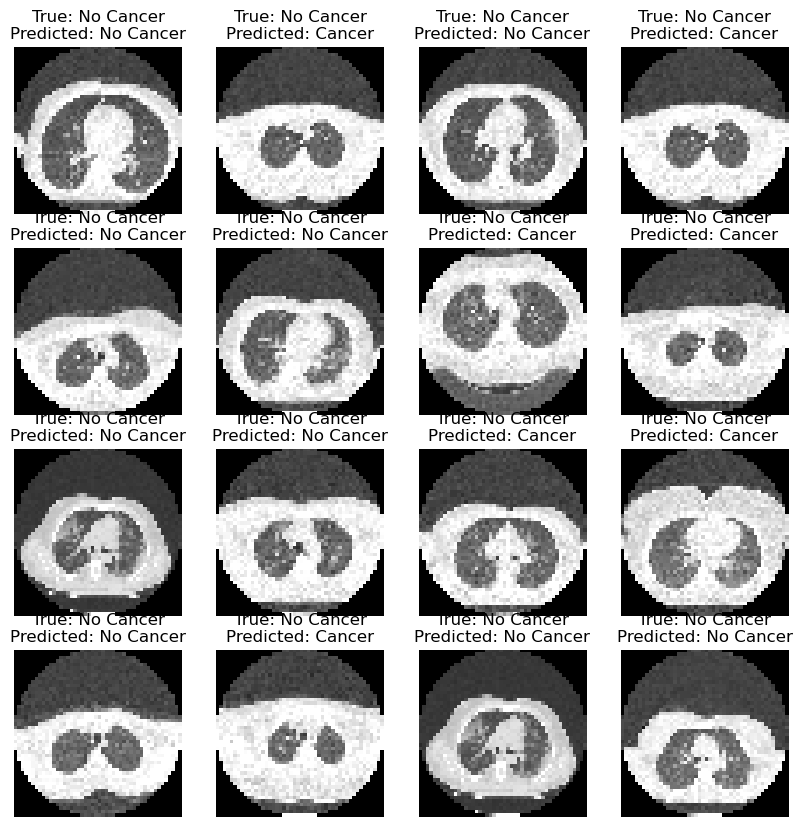

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Process the predictions to determine cancer presence (binary classification)
cancer_present = (predictions.argmax(axis=1) == 1)

# Get the true labels from the test generator
true_labels = test_generator.classes

# Visualize some test images with their predicted labels
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(0, len(test_generator))
    img = test_generator[idx][0][0]
    true_label = true_labels[idx]
    predicted_label = cancer_present[idx]
    ax.imshow(img, cmap='gray')
    ax.set_title(f"True: {'Cancer' if true_label == 1 else 'No Cancer'}\nPredicted: {'Cancer' if predicted_label else 'No Cancer'}")
    ax.axis('off')
    

plt.show()
